In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
session

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
date = session.query(func.max (measurement.date)).all()
date

[('2017-08-23',)]

<Axes: xlabel='date'>

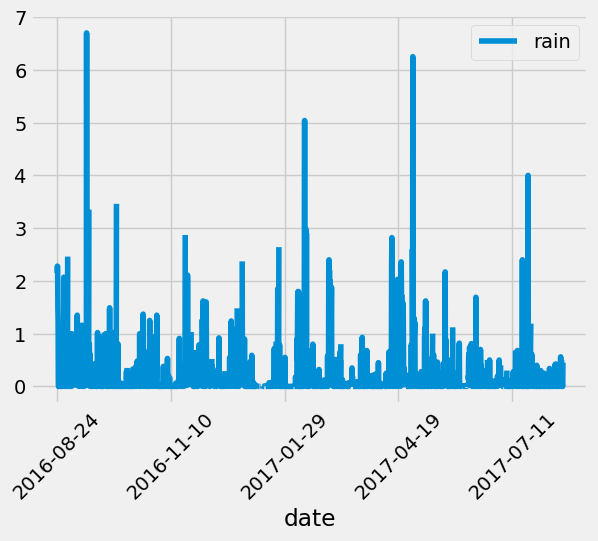

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
starting_date = "2016-08-23"
# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores
prcp = session.query(measurement.date,measurement.prcp).\
filter(measurement.date > starting_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame (prcp,columns= ["date", "rain"])
prcp_df
# Sort the dataframe by date

df = prcp_df.sort_values ("date") 
# Use Pandas Plotting with Matplotlib to plot the data
df.plot (x ="date", y = "rain", rot = 45)


In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
df.describe(percentiles=None, include=None, exclude=None)

,rain
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [21]:
# Design a query to calculate the total number of stations in the dataset
st_count = session.query(func.count (station.station)).all()
st_count
type(str((list(np.ravel(st_count)))[0]))
#new variable is st_count

str

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
st_count = session.query(measurement.station,func.count (measurement.station)).group_by\
(measurement.station).order_by(func.count (measurement.station).desc()).all()
st_count

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
tempd = session.query(func.min(measurement.tobs), func.max(measurement.tobs),func.avg(measurement.tobs)).\
filter(measurement.station == "USC00519281").all()
tempd

[(54.0, 85.0, 71.66378066378067)]

array([[<Axes: title={'center': 'tobs'}>]], dtype=object)

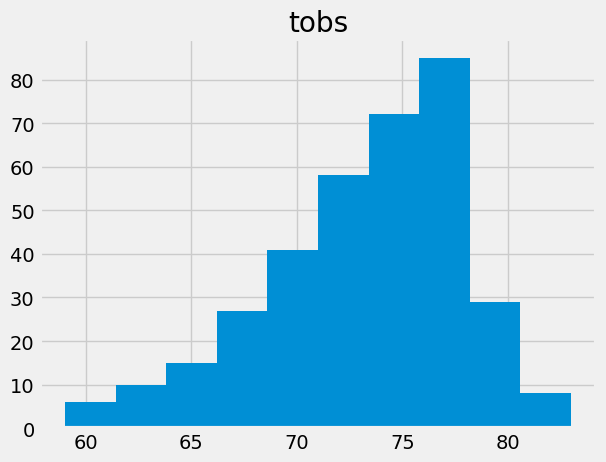

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
yeartemp = session.query(measurement.tobs).filter(measurement.date > starting_date).filter(measurement.station == "USC00519281").all()
yeartemp
DataFrame = pd.DataFrame (yeartemp,columns= ["tobs"])
DataFrame
DataFrame.hist(column= "tobs")


# Close Session

In [16]:
# Close Session
session.close()